In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import r2_score
%matplotlib inline


2025-01-18 22:42:37.387888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 株式データの読み込み
def read_csv_data(input_csv_name):
    df = pd.read_csv(input_csv_name,index_col=0)
    df = df.iloc[::-1] #x軸の前後入れ替え
    print("欠損値の確認")
    print(df.isnull().any())  
    return df

In [3]:
#LSTMによる株価の学習
def lstm_learn_stock_data(df,train_range,train_length,window_size,train_epochs,train_batch_size):
    # 終値のデータ
    data = df.filter(['終値'])
    dataset = data.values
    
    # データを0〜1の範囲に正規化
    scaler = MinMaxScaler(feature_range=(0,train_range))
    scaled_data = scaler.fit_transform(dataset)
    
    # 全体の80%をトレーニングデータとして扱う
    training_data_len = int(np.ceil( len(dataset) * train_length ))
    
    train_data = scaled_data[0:int(training_data_len), :]
    
    # train_dataをx_trainとy_trainに分ける
    x_train, y_train = [], []
    for i in range(window_size, len(train_data)):
        x_train.append(train_data[i-window_size:i, 0])
        y_train.append(train_data[i, 0])
    
    # numpy arrayに変換
    x_train, y_train = np.array(x_train), np.array(y_train)
    print(x_train.shape)
    print(y_train.shape)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    print(x_train.shape)

    #LSTMモデル
    model = Sequential()
    model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error') # 最適化アルゴリズム：Adaptive Moment Estimation評価関数はMSE
    history = model.fit(x_train, y_train, batch_size=train_batch_size, epochs=train_epochs)

    return model
        

In [4]:
input_csv_name = "stock_price.csv"
df = read_csv_data(input_csv_name)# 株式データの読み込み

欠損値の確認
終値       False
始値       False
高値       False
安値       False
出来高      False
変化率 %    False
dtype: bool


In [5]:
train_range = 1.0
train_length = 0.8
window_size = 96
train_epochs = 20
train_batch_size = 32
model = lstm_learn_stock_data(df,train_range,train_length,window_size,train_epochs,train_batch_size) #lstmでの学習を実行


(7266, 96)
(7266,)
(7266, 96, 1)


2025-01-18 22:42:42.510725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-18 22:42:42.512497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-18 22:42:42.513917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2025-01-18 22:42:43.724678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-18 22:42:43.727167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-18 22:42:43.729046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

228/228 [==============================] - 35s 122ms/step - loss: 0.0025
Epoch 2/20
228/228 [==============================] - 27s 118ms/step - loss: 9.9695e-04
Epoch 3/20
228/228 [==============================] - 33s 144ms/step - loss: 0.0014
Epoch 4/20
228/228 [==============================] - 30s 130ms/step - loss: 7.9100e-04
Epoch 5/20
228/228 [==============================] - 30s 132ms/step - loss: 7.4811e-04
Epoch 6/20
228/228 [==============================] - 32s 140ms/step - loss: 7.0253e-04
Epoch 7/20
228/228 [==============================] - 30s 132ms/step - loss: 6.6176e-04
Epoch 8/20
228/228 [==============================] - 31s 134ms/step - loss: 6.0292e-04
Epoch 9/20
228/228 [==============================] - 30s 133ms/step - loss: 6.3142e-04
Epoch 10/20
228/228 [==============================] - 31s 135ms/step - loss: 6.0794e-04
Epoch 11/20
228/228 [==============================] - 30s 132ms/step - loss: 5.6834e-04
Epoch 12/20
228/228 [============================

In [6]:
outputh5name = 'learn.h5' #　保存ファイル名
model.save(outputh5name) # 学習モデル保存
model.summary() # 学習結果表示
 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 96, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 96, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 96, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 96, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 96, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 96, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [7]:
#残りの20％で学習した結果の確認
def stock_prediction(df,test_range,window_size):
    # 終値のデータ
    data = df.filter(['終値'])
    dataset = data.values
    # データを0〜1の範囲に正規化
    scaler_test = MinMaxScaler(feature_range=(0,test_range))
    scaled_data_test = scaler_test.fit_transform(dataset)
    # 全体の80%をトレーニングデータとして扱う
    training_data_len = int(np.ceil( len(dataset) * train_length ))

    # window　size分前からデータ取得
    test_data = scaled_data_test[training_data_len - window_size: , :]
    
    x_test = []
    y_test_scaled = []
    y_test = dataset[training_data_len:, :]
    
    for i in range(window_size, len(test_data)):
        x_test.append(test_data[i-window_size:i, 0])
        y_test_scaled.append(test_data[i,0])

    
    # numpy arrayに変換
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
    
    # 予測を実行
    predictions = model.predict(x_test)
    predictions = scaler_test.inverse_transform(predictions)
    # print(predictions)
    return predictions,y_test,training_data_len

In [8]:
#予測した次の日が上がったか下がったか当たったの評価
def evaluate_accuracy(predictions,y_test):
    # 二乗平均平方根誤差（RMSE）
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    
    # R二乗スコア(r2)
    r2s = r2_score(y_test, predictions)

    # 次の日上がったか下がったかの正解率(accuracy)
    correct = 0
    for i in range(0,len(predictions)-2,1):
         temp_y = y_test[i]-y_test[i+1]
         temp_p = predictions[i]-predictions[i+1]
         if temp_y < 0 and temp_p < 0:
             correct = correct + 1
         elif temp_y > 0 and temp_p > 0:
             correct = correct + 1
         elif temp_y == 0 and temp_p == 0:
             correct = correct + 1
    
    accuracy = correct / len(predictions)

    #次の日上がったか下がったかの正解率
    print("accuracy")
    print(accuracy)

    return rmse,r2s

In [9]:
#次の株取引の日付のIndexを生成
def get_next_date_of_index(df):
    # 終値のデータ
    data = df.filter(['終値'])
    dataset = data.values

    #一週間分のデータ
    plot_plus_len3 = 7
    whole_data_len = int(np.ceil( len(data) ))
    plot_len3 = whole_data_len - plot_plus_len3
    plot_close3 = data[plot_len3:]# + int('2024-06-18')
    # サンプルデータ
    # Date列を基準に再配置
    df_reindexed = plot_close3.filter(['Date'])
    
    last_day = df_reindexed[6:].index
    
    base_date = pd.to_datetime(last_day)  # 最終日
    
    date_index = pd.to_datetime(df_reindexed[:].index)
    
    # 日付型に変換したインデックスの先頭要素から 1 日先の範囲を作成
    last_date = date_index[-1]
    data_weekday = {'date': pd.date_range(last_date, periods=6)}
    
    # 曜日を取得
    weekday_name = data_weekday['date'][-1].day_name()
    
    if weekday_name == 'Friday':
        # 金曜日のため次の株取引開始日時に設定
        days_after = 3  # ３日後の月曜
    else:
        # 次の日の株取引開始日時に設定
        days_after = 1  # １日後
        
    # timedeltaオブジェクトを作成
    delta = pd.DateOffset(days=days_after)
    
    # 基準日を加算して、指定の日付を取得
    after_date = base_date + delta
        
    # 新しいデータ
    new_date = pd.to_datetime(after_date[0])
    new_value = ""
        
    # new_rowを作成
    new_row = pd.Series({new_date: new_value})
    
    return new_row


In [10]:
# 予測結果の評価
def evaluate_prediction_stock(df,plot_days,new_row,rmse,r2s,training_data_len):
    # 終値のデータ
    data = df.filter(['終値'])
    dataset = data.values

    # 移動平均データ作成
    ma_day = [5, 25, 50]
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        df[column_name] = df['終値'].rolling(ma).mean()
        
    date_means_05days = df['MA for 5 days'][training_data_len:]    
    date_means_25days = df['MA for 25 days'][training_data_len:]    
    date_means_50days = df['MA for 50 days'][training_data_len:]
    
    means_05days = date_means_05days.values   
    means_25days = date_means_25days.values    
    means_50days = date_means_50days.values
    
    means_05days = np.reshape(means_05days,[len(means_05days),1])
    means_25days = np.reshape(means_25days,[len(means_25days),1])
    means_50days = np.reshape(means_50days,[len(means_50days),1])

    #平均二乗誤差
    rmse_05days = np.sqrt(np.mean(((means_05days - y_test) ** 2)))
    rmse_25days = np.sqrt(np.mean(((means_25days - y_test) ** 2)))
    rmse_50days = np.sqrt(np.mean(((means_50days - y_test) ** 2)))
    print("rmse:5days       ,25days          ,50days              ,prediction")
    print(rmse_05days,rmse_25days,rmse_50days,rmse)
    #R二乗スコア
    r2s_05days = r2_score(y_test, means_05days)
    r2s_25days = r2_score(y_test, means_25days)
    r2s_50days = r2_score(y_test, means_50days)
    print("r2s:5days        ,25days           ,50days            ,prediction")
    print(r2s_05days,r2s_25days,r2s_50days,r2s)    

    whole_data_len = len(df['終値'])
    plot_len = whole_data_len - plot_days #表示するデータの調整
    plot_close = data[plot_len:]

    #予測分のインデックスを追加
    df_reindexed = pd.concat([plot_close, new_row], axis=0)
    plot_close = df_reindexed.iloc[:, :-1]

    #表示する分だけのデータを入れる
    plot_close['Predictions'] = predictions[len(predictions)-plot_days-1:]

    # インデックスをDatetimeIndexに変換
    plot_close.index = pd.to_datetime(plot_close.index)

    df = pd.concat([df, new_row], axis=0)

    #予測値、終値、5日移動平均、25日移動平均、50日移動平均を表示
    fig = plt.figure(figsize=(16,6))
    plt.title('NTT stock price',fontsize=24)
    x = df.index[plot_len:]
    plt.plot(plot_close.index,plot_close[['Predictions']], linewidth=2)
    plt.plot(plot_close.index,df["終値"][plot_len:])
    plt.plot(plot_close.index,df['MA for 5 days'][plot_len:], linewidth=1, linestyle='dotted')
    plt.plot(plot_close.index,df['MA for 25 days'][plot_len:], linewidth=1)
    plt.plot(plot_close.index,df['MA for 50 days'][plot_len:], linewidth=1, linestyle='dotted')
    N = len(x) #表示するデータ数
    n = 30 #間隔。この値を調整
#    plt.xticks(x[::n], rotation=45, ha='right')
    
    plt.legend(['NTT prediction stock price','NTT close stock price','MA for 5 days','MA for 25 days','MA for 50 days'])
    plt.tight_layout() #ラベルなどが切れないように調整
    plt.ylabel('Price',fontsize=24)
    plt.xlabel('Date',fontsize=24)
    plt.show()
    fig.savefig("ntt_stock_prediction.png")
    plt.close()

In [11]:
#df = read_csv_data(input_csv_name)# 株式データの読み込み
test_range = 1.0
predictions,y_test,training_data_len = stock_prediction(df,test_range,window_size)#　残りの20％で学習した結果の確認

2025-01-18 22:57:28.348317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-18 22:57:28.350441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-18 22:57:28.351807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

58/58 [==============================] - 3s 30ms/step


accuracy
0.46902173913043477
rmse:5days       ,25days          ,50days              ,prediction
1.5848991189950552 3.8318164066031453 5.326886887577347 4.17323258870848
r2s:5days        ,25days           ,50days            ,prediction
0.9968773748229275 0.9817473471388768 0.9647252813143372 0.9783498061495971


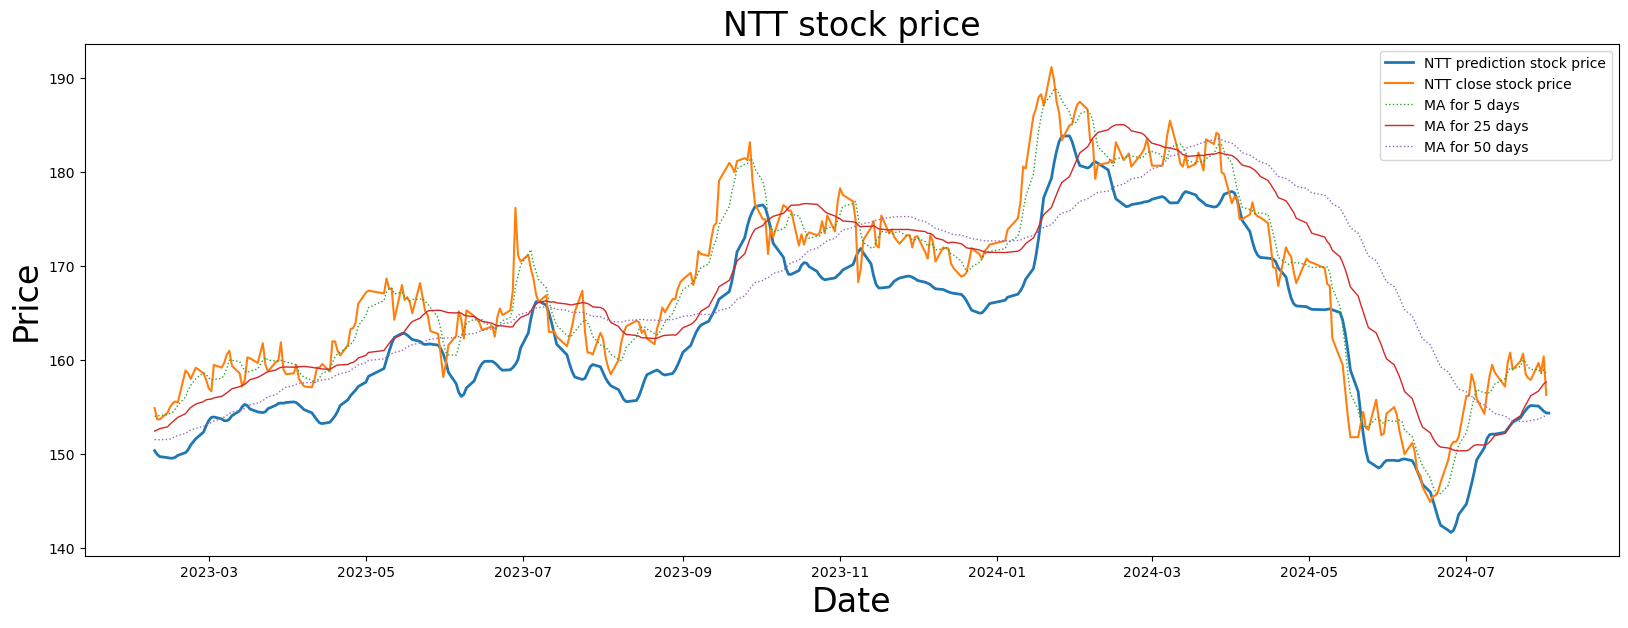

In [12]:
rmse,r2s = evaluate_accuracy(predictions,y_test)#　予測した次の日が上がったか下がったか当たったの評価
new_row = get_next_date_of_index(df)#　次の株取引の日付のIndexを生成
evaluate_prediction_stock(df,365,new_row,rmse,r2s,training_data_len)# 予測結果の評価